# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [6]:
import os

# Change the working directory to the correct path
os.chdir(r"C:\Users\n.rennie\Documents\Module 6 challenge\python-api-challenge\WeatherPy")

# Verify the change
print(os.getcwd())




C:\Users\n.rennie\Documents\Module 6 challenge\python-api-challenge\WeatherPy


In [7]:
# Dependencies and Setup
import requests
import json
import matplotlib.pyplot as plt
import pandas as pd
from citipy import citipy
from scipy.stats import linregress


# Impor the OpenWeatherMap API key
from api_keys import weather_api_key



### Generate the Cities List by Using the `citipy` Library

In [9]:
import numpy as np


# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 607


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [10]:
import time
import requests
from api_keys import weather_api_key

# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid={weather_api_key}&units=metric"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # Pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | anadyr
Processing Record 2 of Set 1 | tual
Processing Record 3 of Set 1 | papatowai
Processing Record 4 of Set 1 | yorkton
Processing Record 5 of Set 1 | puerto natales
Processing Record 6 of Set 1 | khasab
Processing Record 7 of Set 1 | hawaiian paradise park
Processing Record 8 of Set 1 | west island
Processing Record 9 of Set 1 | wailua homesteads
Processing Record 10 of Set 1 | avarua
Processing Record 11 of Set 1 | puerto san carlos
City not found. Skipping...
Processing Record 12 of Set 1 | taiohae
City not found. Skipping...
Processing Record 13 of Set 1 | port alfred
Processing Record 14 of Set 1 | bredasdorp
Processing Record 15 of Set 1 | edinburgh of the seven seas
Processing Record 16 of Set 1 | cole harbour
Processing Record 17 of Set 1 | san antonio de pale
Processing Record 18 of Set 1 | cable beach
City not found. Skipping...
Processing Record 19 of Set 1 | yellowknife
Processing 

In [11]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          578
Lat           578
Lng           578
Max Temp      578
Humidity      578
Cloudiness    578
Wind Speed    578
Country       578
Date          578
dtype: int64

In [12]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,anadyr,64.7500,177.4833,11.28,76,20,5.00,RU,1723473630
1,tual,-5.6667,132.7500,25.72,86,65,8.90,ID,1723473631
2,papatowai,-46.5619,169.4708,6.50,85,96,3.66,NZ,1723473632
3,yorkton,51.2167,-102.4677,14.91,77,0,2.57,CA,1723473633
4,puerto natales,-51.7236,-72.4875,5.25,87,75,8.75,CL,1723473168


In [13]:
import os

# Create the output directory if it doesn't exist
if not os.path.exists("output_data"):
    os.makedirs("output_data")

In [14]:
# Load the CSV file into a DataFrame
file_path = r"C:\Users\n.rennie\Documents\Module 6 challenge\python-api-challenge\output_data\cities.csv"
city_data_df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame to verify
print(city_data_df.head())

   City_ID         City      Lat       Lng  Max Temp  Humidity  Cloudiness  \
0        0         faya  18.3851   42.4509     22.06        35          21   
1        1      farsund  58.0948    6.8047     13.30       100           0   
2        2  new norfolk -42.7826  147.0587     11.72        58          12   
3        3    jamestown  42.0970  -79.2353      5.77        77         100   
4        4      lanzhou  36.0564  103.7922     14.53        48          59   

   Wind Speed Country        Date  
0        2.60      SA  1666108228  
1        7.65      NO  1666108228  
2        1.34      AU  1666108230  
3        9.77      US  1666107934  
4        1.20      CN  1666108230  


In [15]:
print(city_data_df.columns)


Index(['City_ID', 'City', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness',
       'Wind Speed', 'Country', 'Date'],
      dtype='object')


In [16]:
# Assuming you are inside a loop where you are retrieving data for each city
try:
    # Example city data (replace this with your actual API response handling)
    city_weather = {
        "coord": {"lat": 35.68, "lon": 139.69},
        "main": {"temp_max": 22.5, "humidity": 68},
        "clouds": {"all": 75},
        "wind": {"speed": 5.2},
        "sys": {"country": "JP"},
        "dt": 1623456789
    }
    
    city_lat = city_weather["coord"]["lat"]
    city_lng = city_weather["coord"]["lon"]
    city_max_temp = city_weather["main"]["temp_max"]
    city_humidity = city_weather["main"]["humidity"]
    city_clouds = city_weather["clouds"]["all"]
    city_wind = city_weather["wind"]["speed"]
    city_country = city_weather["sys"]["country"]
    city_date = city_weather["dt"]
    
    # Append the City information into city_data list
    city_data.append({
        "City": "ExampleCity",
        "Lat": city_lat,
        "Lng": city_lng,
        "Max Temp": city_max_temp,
        "Humidity": city_humidity,
        "Cloudiness": city_clouds,
        "Wind Speed": city_wind,
        "Country": city_country,
        "Date": city_date
    })
except Exception as e:
    print(f"An error occurred: {e}")


In [17]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Verify the DataFrame
print(city_data_df.head())
print(city_data_df.columns)


             City      Lat       Lng  Max Temp  Humidity  Cloudiness  \
0          anadyr  64.7500  177.4833     11.28        76          20   
1            tual  -5.6667  132.7500     25.72        86          65   
2       papatowai -46.5619  169.4708      6.50        85          96   
3         yorkton  51.2167 -102.4677     14.91        77           0   
4  puerto natales -51.7236  -72.4875      5.25        87          75   

   Wind Speed Country        Date  
0        5.00      RU  1723473630  
1        8.90      ID  1723473631  
2        3.66      NZ  1723473632  
3        2.57      CA  1723473633  
4        8.75      CL  1723473168  
Index(['City', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness',
       'Wind Speed', 'Country', 'Date'],
      dtype='object')


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

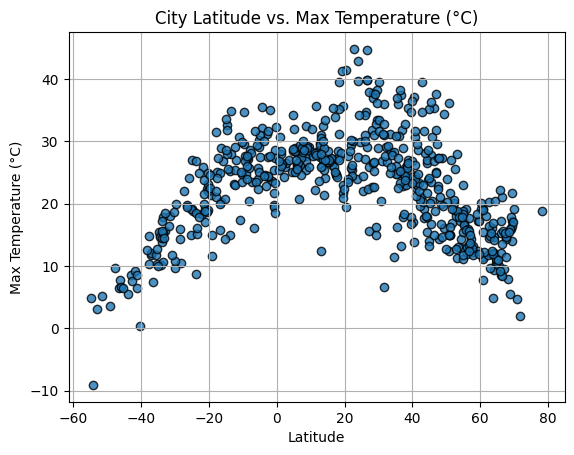

In [18]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolor="black", linewidths=1, marker="o", alpha=0.8)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (°C)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°C)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

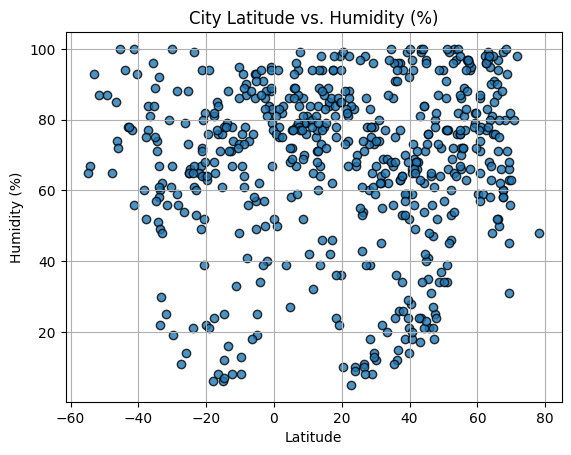

In [19]:
# Build scatter plot for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolor="black", linewidths=1, marker="o", alpha=0.8)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

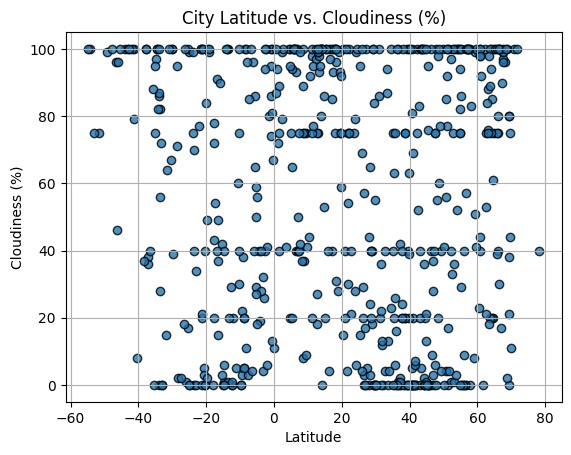

In [20]:
# Build scatter plot for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolor="black", linewidths=1, marker="o", alpha=0.8)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

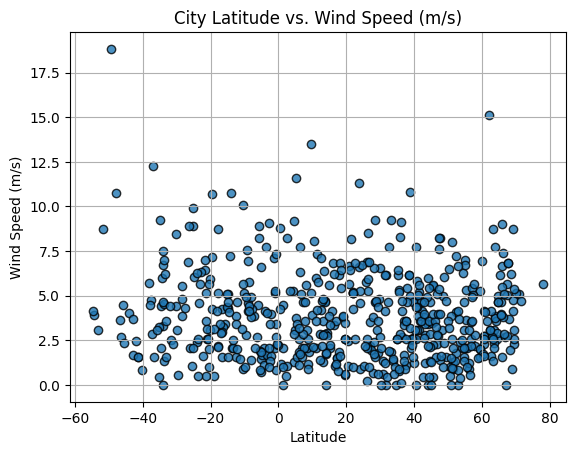

In [21]:
# Build scatter plot for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolor="black", linewidths=1, marker="o", alpha=0.8)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [22]:
from scipy.stats import linregress
import matplotlib.pyplot as plt

def plot_linear_regression(x_values, y_values, title, xlabel, ylabel, hemisphere_label):
    # Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    
    # Calculate regression line
    regress_values = x_values * slope + intercept
    line_eq = f"y = {slope:.2f}x + {intercept:.2f}"
    
    # Create scatter plot
    plt.scatter(x_values, y_values, edgecolor="black", linewidths=1, marker="o", alpha=0.8)
    
    # Plot regression line
    plt.plot(x_values, regress_values, "r-")
    
    # Annotate the regression line equation
    plt.annotate(line_eq, (min(x_values) + 5, max(y_values) - 5), fontsize=15, color="red")
    
    # Incorporate additional graph properties
    plt.title(f"{hemisphere_label} Hemisphere: {title}")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True)
    
    # Display the r-squared value
    print(f"The r-squared is: {rvalue**2:.3f}")
    
    # Show the plot
    plt.show()


In [23]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,anadyr,64.7500,177.4833,11.28,76,20,5.00,RU,1723473630
3,yorkton,51.2167,-102.4677,14.91,77,0,2.57,CA,1723473633
5,khasab,26.1799,56.2477,34.66,54,29,0.22,OM,1723473635
6,hawaiian paradise park,19.5933,-154.9731,21.73,98,75,2.57,US,1723473637
8,wailua homesteads,22.0669,-159.3780,25.44,88,75,5.14,US,1723473639


In [24]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,tual,-5.6667,132.7500,25.72,86,65,8.90,ID,1723473631
2,papatowai,-46.5619,169.4708,6.50,85,96,3.66,NZ,1723473632
4,puerto natales,-51.7236,-72.4875,5.25,87,75,8.75,CL,1723473168
7,west island,-12.1568,96.8225,26.99,74,20,4.63,CC,1723473638
9,avarua,-21.2078,-159.7750,17.03,94,100,0.51,CK,1723473640


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.406


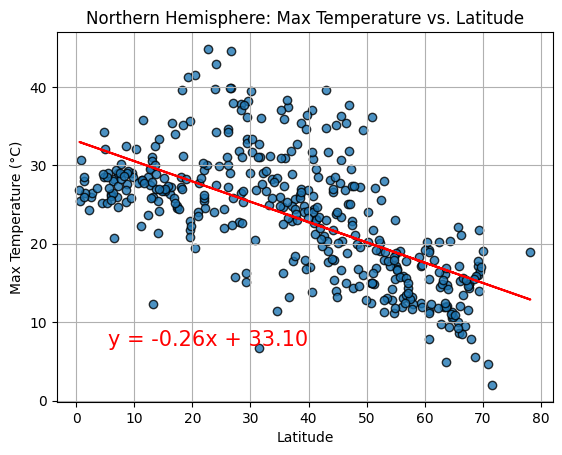

In [25]:
from scipy.stats import linregress
import matplotlib.pyplot as plt

# Perform linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Calculate regression line
regress_values = x_values * slope + intercept
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

# Plot data and regression line
plt.scatter(x_values, y_values, edgecolor="black", linewidths=1, marker="o", alpha=0.8)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (min(x_values)+5, min(y_values)+5), fontsize=15, color="red")
plt.title("Northern Hemisphere: Max Temperature vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°C)")
plt.grid(True)

# Display the r-squared value
print(f"The r-squared is: {rvalue**2:.3f}")

# Show plot
plt.show()


The r-squared is: 0.687


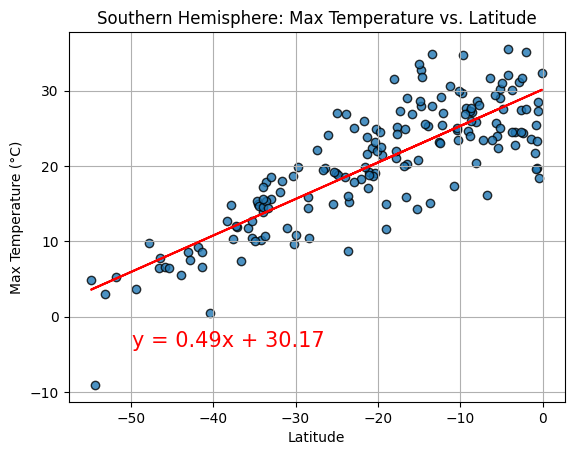

In [26]:
from scipy.stats import linregress
import matplotlib.pyplot as plt

# Perform linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Calculate regression line
regress_values = x_values * slope + intercept
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

# Plot data and regression line
plt.scatter(x_values, y_values, edgecolor="black", linewidths=1, marker="o", alpha=0.8)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (min(x_values)+5, min(y_values)+5), fontsize=15, color="red")
plt.title("Southern Hemisphere: Max Temperature vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°C)")
plt.grid(True)

# Display the r-squared value
print(f"The r-squared is: {rvalue**2:.3f}")

# Show plot
plt.show()


**Discussion about the linear relationship:** Both graphs show the expected relationship between latitude and temperature: temperatures generally increase as you move toward the equator and decrease as you move away from it. However, the relationship is stronger and more pronounced in the Southern Hemisphere, as indicated by the steeper slope. This could be due to the distribution of land and ocean, or other climatic factors that differ between the hemispheres.

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.000


C:\Users\n.rennie\AppData\Local\Temp\ipykernel_18092\2483479568.py:14: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x_values, regress_values, "r-", color="red")


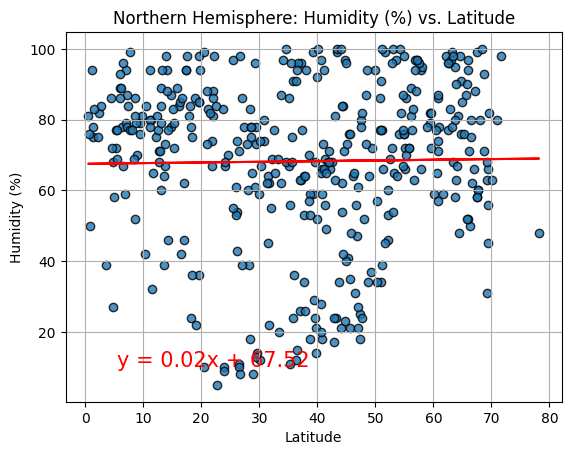

In [27]:
# Linear regression on Northern Hemisphere - Humidity vs. Latitude
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Calculate regression line
regress_values = x_values * slope + intercept
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

# Plot data and regression line
plt.scatter(x_values, y_values, edgecolor="black", linewidths=1, marker="o", alpha=0.8)
plt.plot(x_values, regress_values, "r-", color="red")
plt.annotate(line_eq, (min(x_values)+5, min(y_values)+5), fontsize=15, color="red")
plt.title("Northern Hemisphere: Humidity (%) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Display the r-squared value
print(f"The r-squared is: {rvalue**2:.3f}")

# Show plot
plt.show()


The r-squared is: 0.005


C:\Users\n.rennie\AppData\Local\Temp\ipykernel_18092\2345140224.py:14: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x_values, regress_values, "r-", color="red")


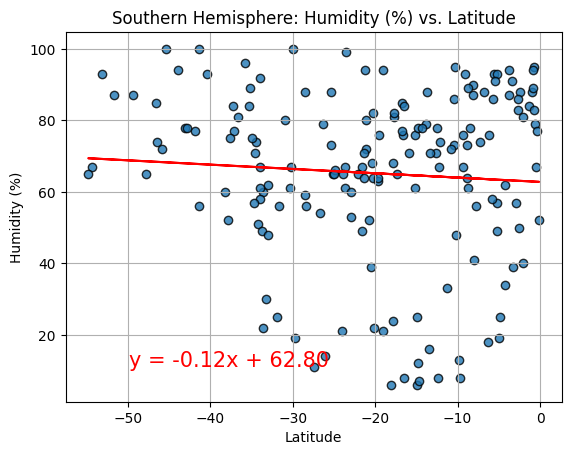

In [28]:
# Linear regression on Southern Hemisphere - Humidity vs. Latitude
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Calculate regression line
regress_values = x_values * slope + intercept
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

# Plot data and regression line
plt.scatter(x_values, y_values, edgecolor="black", linewidths=1, marker="o", alpha=0.8)
plt.plot(x_values, regress_values, "r-", color="red")
plt.annotate(line_eq, (min(x_values)+5, min(y_values)+5), fontsize=15, color="red")
plt.title("Southern Hemisphere: Humidity (%) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Display the r-squared value
print(f"The r-squared is: {rvalue**2:.3f}")

# Show plot
plt.show()


**Discussion about the linear relationship:** The weak and nearly flat slopes in both hemispheres indicate that latitude is not a strong predictor of humidity. The scatter plots show a wide dispersion of data points, supporting the idea that humidity is influenced by a complex set of factors beyond just geographic latitude.

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.005


C:\Users\n.rennie\AppData\Local\Temp\ipykernel_18092\3571766064.py:14: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x_values, regress_values, "r-", color="red")


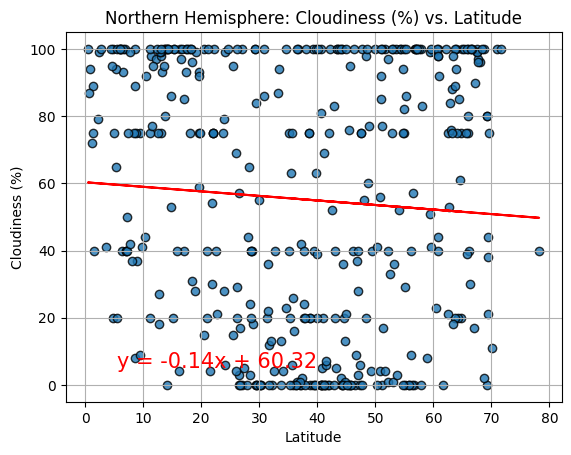

In [29]:
# Linear regression on Northern Hemisphere - Cloudiness vs. Latitude
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Calculate regression line
regress_values = x_values * slope + intercept
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

# Plot data and regression line
plt.scatter(x_values, y_values, edgecolor="black", linewidths=1, marker="o", alpha=0.8)
plt.plot(x_values, regress_values, "r-", color="red")
plt.annotate(line_eq, (min(x_values)+5, min(y_values)+5), fontsize=15, color="red")
plt.title("Northern Hemisphere: Cloudiness (%) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Display the r-squared value
print(f"The r-squared is: {rvalue**2:.3f}")

# Show plot
plt.show()


The r-squared is: 0.070


C:\Users\n.rennie\AppData\Local\Temp\ipykernel_18092\3542959284.py:14: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x_values, regress_values, "r-", color="red")


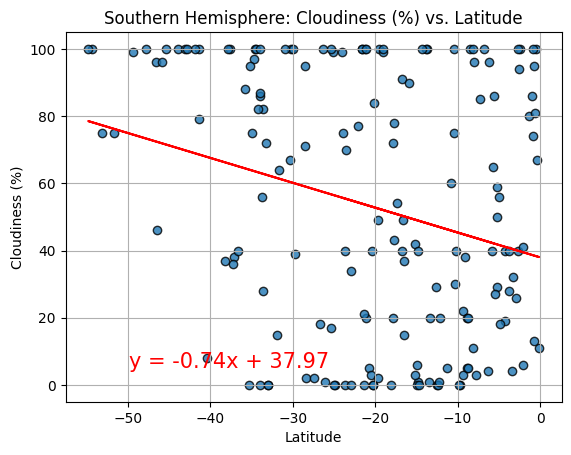

In [30]:
# Linear regression on Southern Hemisphere - Cloudiness vs. Latitude
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Calculate regression line
regress_values = x_values * slope + intercept
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

# Plot data and regression line
plt.scatter(x_values, y_values, edgecolor="black", linewidths=1, marker="o", alpha=0.8)
plt.plot(x_values, regress_values, "r-", color="red")
plt.annotate(line_eq, (min(x_values)+5, min(y_values)+5), fontsize=15, color="red")
plt.title("Southern Hemisphere: Cloudiness (%) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Display the r-squared value
print(f"The r-squared is: {rvalue**2:.3f}")

# Show plot
plt.show()


**Discussion about the linear relationship:** Both hemispheres show a negative relationship between latitude and cloudiness, but the relationship is stronger in the Southern Hemisphere compared to the Northern Hemisphere. However, the overall weak slopes and scattered data points in both hemispheres suggest that cloudiness is not strongly dependent on latitude alone, and other meteorological factors likely contribute to the observed patterns.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.000


C:\Users\n.rennie\AppData\Local\Temp\ipykernel_18092\1878379092.py:14: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x_values, regress_values, "r-", color="red")


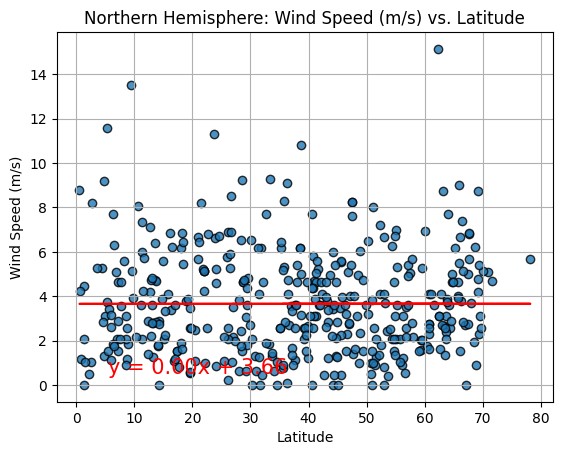

In [31]:
# Linear regression on Northern Hemisphere - Wind Speed vs. Latitude
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Calculate regression line
regress_values = x_values * slope + intercept
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

# Plot data and regression line
plt.scatter(x_values, y_values, edgecolor="black", linewidths=1, marker="o", alpha=0.8)
plt.plot(x_values, regress_values, "r-", color="red")
plt.annotate(line_eq, (min(x_values)+5, min(y_values)+0.5), fontsize=15, color="red")
plt.title("Northern Hemisphere: Wind Speed (m/s) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Display the r-squared value
print(f"The r-squared is: {rvalue**2:.3f}")

# Show plot
plt.show()


The r-squared is: 0.019


C:\Users\n.rennie\AppData\Local\Temp\ipykernel_18092\967551992.py:14: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x_values, regress_values, "r-", color="red")


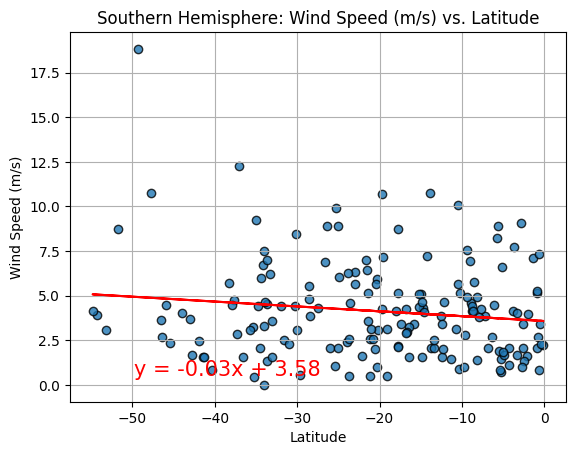

In [32]:
# Linear regression on Southern Hemisphere - Wind Speed vs. Latitude
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Calculate regression line
regress_values = x_values * slope + intercept
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

# Plot data and regression line
plt.scatter(x_values, y_values, edgecolor="black", linewidths=1, marker="o", alpha=0.8)
plt.plot(x_values, regress_values, "r-", color="red")
plt.annotate(line_eq, (min(x_values)+5, min(y_values)+0.5), fontsize=15, color="red")
plt.title("Southern Hemisphere: Wind Speed (m/s) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Display the r-squared value
print(f"The r-squared is: {rvalue**2:.3f}")

# Show plot
plt.show()


**Discussion about the linear relationship:** YOUR RESPONSE HERE

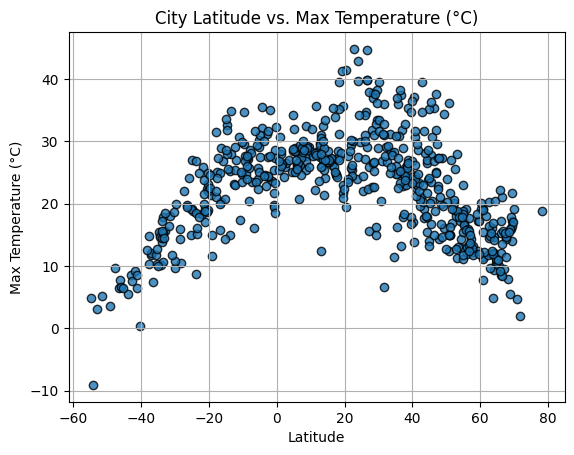

In [33]:

# Scatter plot for Latitude vs. Max Temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolor="black", linewidths=1, marker="o", alpha=0.8)
plt.title("City Latitude vs. Max Temperature (°C)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°C)")
plt.grid(True)
plt.savefig("output_data/Fig1.png")
plt.show()


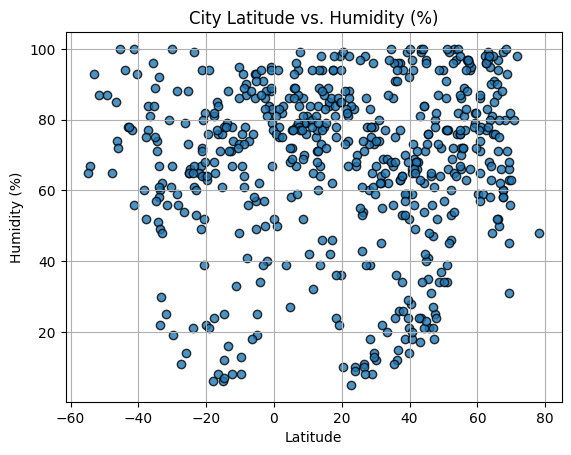

In [34]:

# Scatter plot for Latitude vs. Humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolor="black", linewidths=1, marker="o", alpha=0.8)
plt.title("City Latitude vs. Humidity (%)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)
plt.savefig("output_data/Fig2.png")
plt.show()


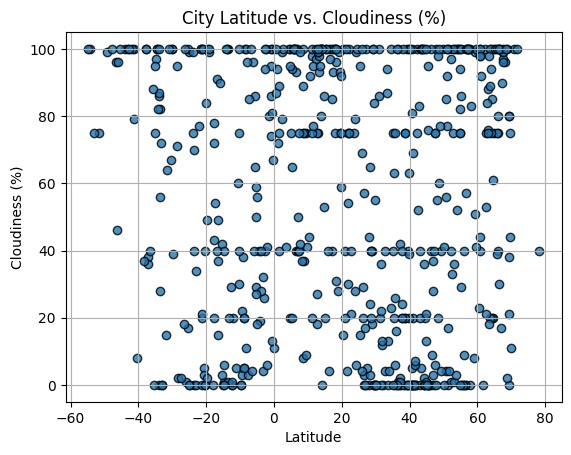

In [35]:

# Scatter plot for Latitude vs. Cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolor="black", linewidths=1, marker="o", alpha=0.8)
plt.title("City Latitude vs. Cloudiness (%)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)
plt.savefig("output_data/Fig3.png")
plt.show()


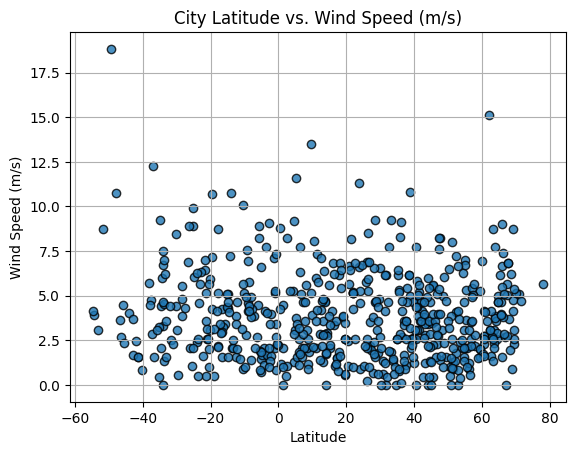

In [36]:

# Scatter plot for Latitude vs. Wind Speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolor="black", linewidths=1, marker="o", alpha=0.8)
plt.title("City Latitude vs. Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)
plt.savefig("output_data/Fig4.png")
plt.show()


The r-squared is: 0.406


C:\Users\n.rennie\AppData\Local\Temp\ipykernel_18092\3573708779.py:10: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x_values, regress_values, "r-", color="red")


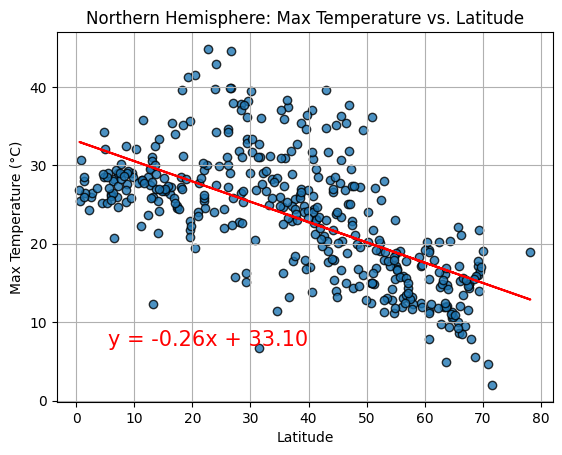

In [37]:

# Linear regression on Northern Hemisphere - Temperature vs. Latitude
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

plt.scatter(x_values, y_values, edgecolor="black", linewidths=1, marker="o", alpha=0.8)
plt.plot(x_values, regress_values, "r-", color="red")
plt.annotate(line_eq, (min(x_values)+5, min(y_values)+5), fontsize=15, color="red")
plt.title("Northern Hemisphere: Max Temperature vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°C)")
plt.grid(True)
print(f"The r-squared is: {rvalue**2:.3f}")
plt.savefig("output_data/Fig5.png")
plt.show()


The r-squared is: 0.687


C:\Users\n.rennie\AppData\Local\Temp\ipykernel_18092\1237097680.py:10: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x_values, regress_values, "r-", color="red")


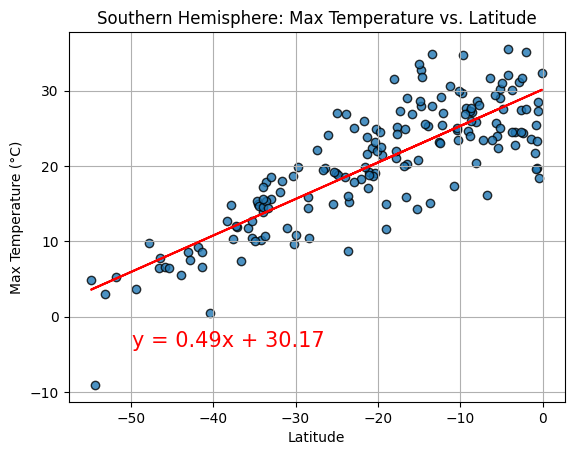

In [38]:

# Linear regression on Southern Hemisphere - Temperature vs. Latitude
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

plt.scatter(x_values, y_values, edgecolor="black", linewidths=1, marker="o", alpha=0.8)
plt.plot(x_values, regress_values, "r-", color="red")
plt.annotate(line_eq, (min(x_values)+5, min(y_values)+5), fontsize=15, color="red")
plt.title("Southern Hemisphere: Max Temperature vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°C)")
plt.grid(True)
print(f"The r-squared is: {rvalue**2:.3f}")
plt.savefig("output_data/Fig6.png")
plt.show()
